c:\Users\ChrisSaid\anaconda3\envs\BiQ_env_20231205\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)


Sample Size Calculation Report

Confidence Level: 95%
Effect Size: 0.5
Minimum Sample Size Needed (Statistical Power 0.8): 51
Data Type: Continuous
Test Type: One-sided (> H0)




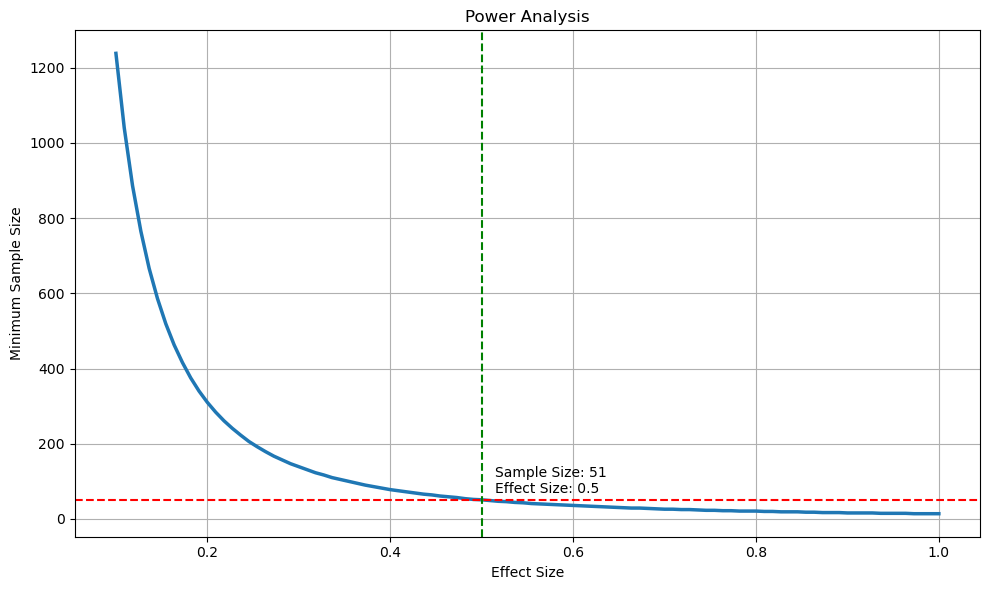

In [2]:
import tkinter as tk
from tkinter import ttk
import math
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import numpy as np

def calculate_sample_size(confidence_level, effect_size, power, data_type, test_type):
    alpha_levels = {
        "80%": 0.2,
        "85%": 0.15,
        "90%": 0.1,
        "95%": 0.05,
        "99%": 0.01
    }
    alpha = alpha_levels.get(confidence_level, None)

    if alpha is None:
        print(f"Confidence level '{confidence_level}' not supported.")
        return None

    if data_type == 'Continuous':
        # Calculate sample size for continuous data
        nobs1 = smp.TTestIndPower().solve_power(
            effect_size=effect_size, alpha=alpha, power=power, nobs1=None, alternative=test_type
        )
    elif data_type == 'Discrete':
        # Calculate sample size for discrete data
        nobs1 = smp.GofChisquarePower().solve_power(
            effect_size=effect_size, n_bins=num_categories.get(), alpha=alpha, power=power
        )
    else:
        print(f"Invalid data type: {data_type}")
        return None

    return math.ceil(nobs1)

def generate_report(confidence_level, effect_size, min_sample_size, power, data_type, test_type):
    report = f"Sample Size Calculation Report\n\n"
    report += f"Confidence Level: {confidence_level}\n"
    report += f"Effect Size: {effect_size}\n"
    report += f"Minimum Sample Size Needed (Statistical Power {power}): {min_sample_size}\n"
    report += f"Data Type: {data_type}\n"
    
    # Adjust Test Type reporting based on conditions
    if data_type == 'Continuous':
        if test_type == 'two-sided':
            report += f"Test Type: {test_type}\n\n"
        elif test_type == 'larger':
            report += "Test Type: One-sided\n\n"
    else:
        report += "\n"

    result_label.config(text=report)  # Update result label in GUI
    print(report)


def calculate_button_clicked():
    try:
        confidence_level = confidence_combobox.get()
        effect_size = float(effect_size_entry.get())
        power = float(power_entry.get())
        data_type = data_type_combobox.get()
        test_type = 'larger' if test_combobox.get() == 'One-sided' else 'two-sided'

        min_sample_size = calculate_sample_size(confidence_level, effect_size, power, data_type, test_type)
        generate_report(confidence_level, effect_size, min_sample_size, power, data_type, test_type)

        effect_sizes = np.linspace(0.1, 1, 100)
        sample_sizes = [calculate_sample_size(confidence_level, es, power, data_type, test_type) for es in effect_sizes]

        plt.figure(figsize=(10, 6))
        plt.plot(effect_sizes, sample_sizes, linewidth=2.5)
        plt.title('Power Analysis')
        plt.xlabel("Effect Size")
        plt.ylabel('Minimum Sample Size')
        plt.grid(True)

        user_effect_size = float(effect_size_entry.get())
        user_sample_size = sample_sizes[np.argmin(np.abs(effect_sizes - user_effect_size))]

        label_x = user_effect_size + 0.015
        label_y = user_sample_size + 50

        plt.axvline(x=user_effect_size, color='green', linestyle='--', label='Effect Size')
        plt.axhline(y=user_sample_size, color='red', linestyle='--', label='Sample Size')
        plt.text(label_x, label_y, f'Sample Size: {user_sample_size}\nEffect Size: {effect_size}', va='center', ha='left', color='black')
        
        plt.tight_layout()
        plt.show()

        result_label.config(text="Report printed in terminal")
    except ValueError as e:
        result_label.config(text=f"Error: {e}")

def toggle_category_entry():
    if data_type_combobox.get() == 'Discrete':
        num_categories_entry.config(state=tk.NORMAL)
    else:
        num_categories_entry.config(state=tk.DISABLED)

def toggle_test_type():
    if data_type_combobox.get() == 'Discrete':
        test_combobox.config(state=tk.DISABLED)
    else:
        test_combobox.config(state=tk.NORMAL)

root = tk.Tk()
root.title("Sample Size Calculator")

ttk.Label(root, text="Confidence Level:").pack()
confidence_combobox = ttk.Combobox(root, values=["80%", "85%", "90%", "95%", "99%"])
confidence_combobox.pack()
confidence_combobox.set("95%")  

ttk.Label(root, text="Effect Size:").pack()
effect_size_entry = ttk.Entry(root)
effect_size_entry.pack()
effect_size_entry.insert(0, "0.5")  

ttk.Label(root, text="Desired Statistical Power:").pack()
power_entry = ttk.Entry(root)
power_entry.pack()
power_entry.insert(0, "0.8")  

ttk.Label(root, text="Data Type:").pack()
data_type_combobox = ttk.Combobox(root, values=["Continuous", "Discrete"], 
                                  state="readonly")
data_type_combobox.pack()
data_type_combobox.set("Continuous")
data_type_combobox.bind("<<ComboboxSelected>>", lambda event: (toggle_category_entry(), toggle_test_type()))

ttk.Label(root, text="Number of categories:").pack()
num_categories = tk.IntVar()
num_categories_entry = ttk.Entry(root, textvariable=num_categories, state=tk.DISABLED)
num_categories_entry.pack()

ttk.Label(root, text="Test Type:").pack()
test_combobox = ttk.Combobox(root, values=["One-sided", "Two-sided"], 
                             state="readonly")
test_combobox.pack()
test_combobox.set("One-sided")

calculate_button = ttk.Button(root, text="Calculate Sample Size", command=calculate_button_clicked)
calculate_button.pack()

result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()
